In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
import string
import json
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54000 non-null  int64 
 1   movie_name  54000 non-null  object
 2   synopsis    54000 non-null  object
 3   genre       54000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [5]:
test = pd.read_csv('test dataset.csv')
test.tail()

,id,movie_name,synopsis,genre
35995,73156,Mysterious Doctor Satan,A mad scientist plots the domination of Americ...,action
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy...,action
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after ...,action
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics tech...,action
35999,7302,Mr. Nice Guy,A Chinese chef accidentally gets involved with...,action


In [6]:
test.drop('genre',axis=1)

,id,movie_name,synopsis
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,00..."
1,48456,Intermedio,A group of four teenage friends become trapped...
2,41383,30 Chua Phai Tet,A guy left his home for 12 years till he came ...
3,84007,Paranoiac,A man long believed dead returns to the family...
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on E..."
...,...,...,...
35995,73156,Mysterious Doctor Satan,A mad scientist plots the domination of Americ...
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy...
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after ...
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics tech...


In [7]:
train['genre'].value_counts()

mystery      5400
crime        5400
thriller     5400
family       5400
fantasy      5400
romance      5400
adventure    5400
action       5400
horror       5400
scifi        5400
Name: genre, dtype: int64

In [8]:
def clean_text(text):
    text = re.sub("\'", "", text) 
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower() 
    return text
print("Text Cleaned")

Text Cleaned


In [9]:
train['plot'] = train['synopsis'].apply(lambda x: clean_text(x))

In [10]:
test['plot'] = test['synopsis'].apply(lambda x: clean_text(x))

MOST FREQUENT WORDS IN THE PLOT


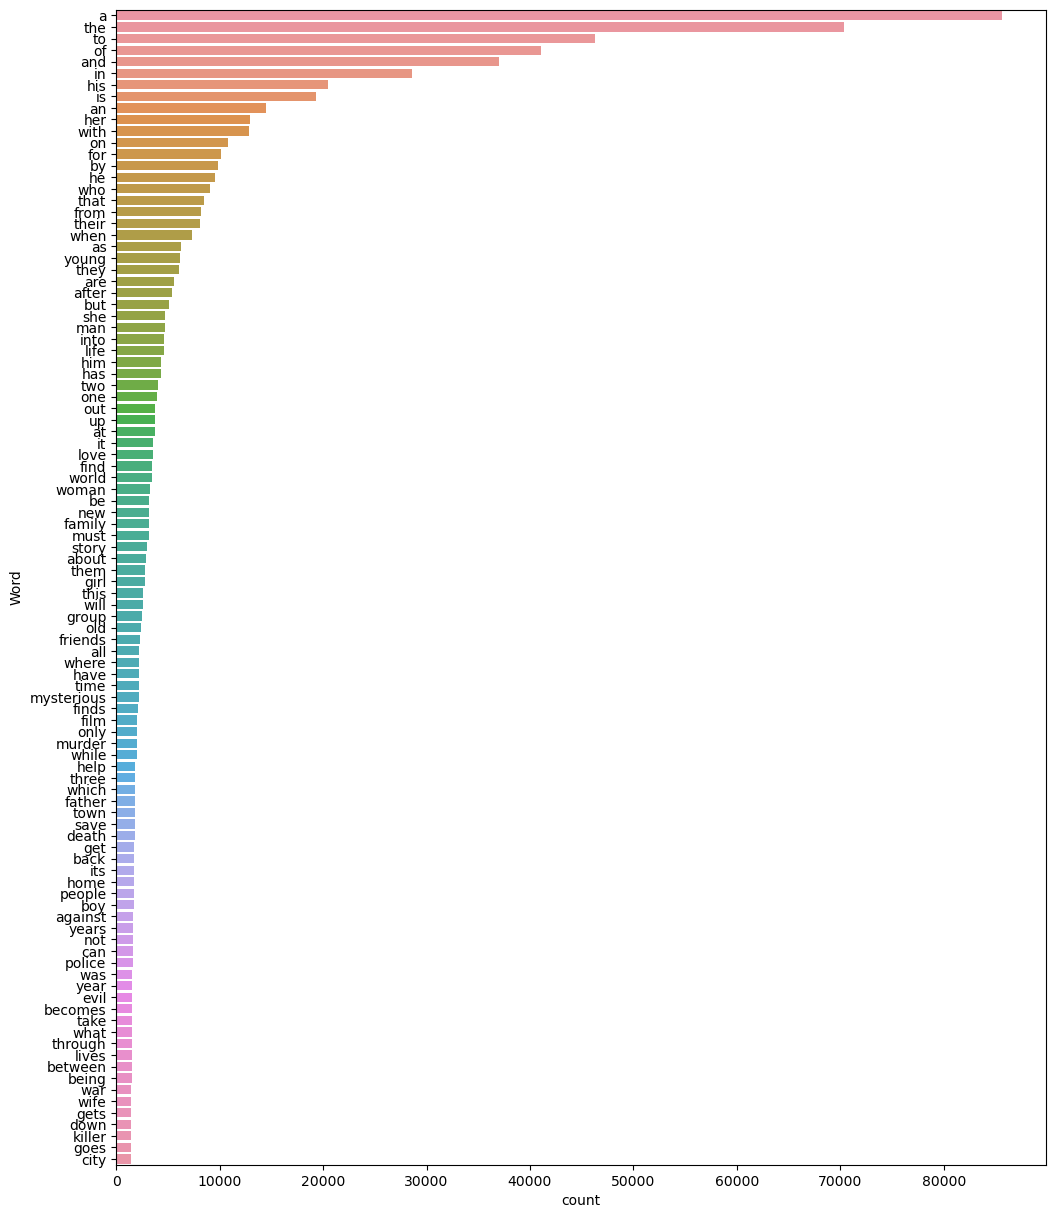

In [11]:
print("MOST FREQUENT WORDS IN THE PLOT")
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})  
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show() 
freq_words(train['plot'], 100)

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

train['plot'] = train['plot'].apply(lambda x: remove_stopwords(x))
print("STOPWORDS REMOVED")

STOPWORDS REMOVED


FREQUENT WORDS AFTER REMOVING STOP WORDS


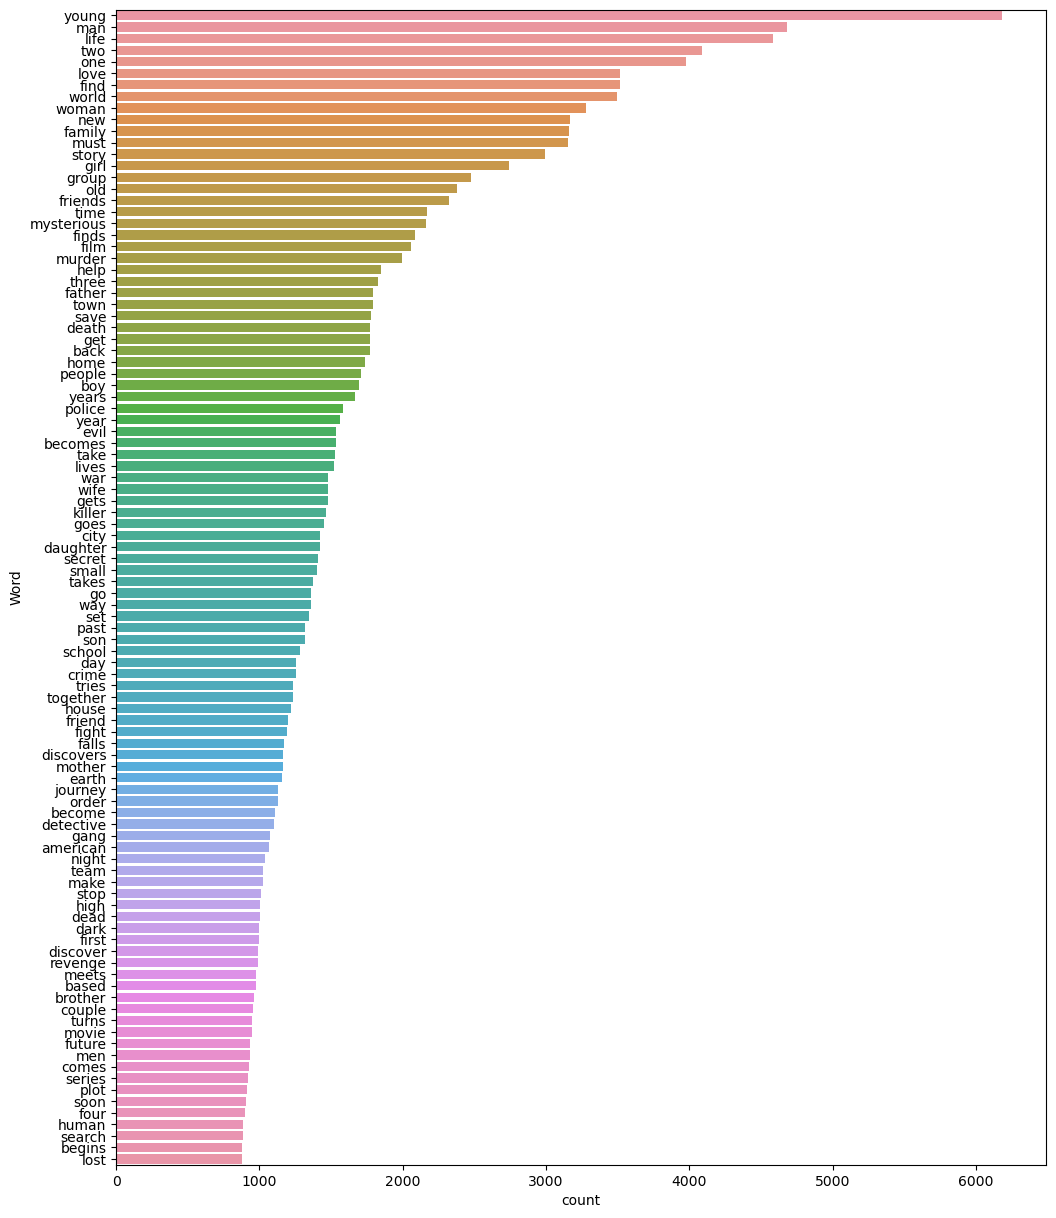

In [13]:
print("FREQUENT WORDS AFTER REMOVING STOP WORDS")
freq_words(train['plot'], 100)

In [14]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train['plot'])
X_test = tfidf_vectorizer.transform(test['plot'])

In [15]:
X = X_train
y = train['genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.3510185185185185
              precision    recall  f1-score   support

      action       0.29      0.24      0.27      1094
   adventure       0.28      0.21      0.24      1067
       crime       0.36      0.40      0.38      1134
      family       0.40      0.43      0.41      1049
     fantasy       0.31      0.28      0.30      1057
      horror       0.39      0.46      0.42      1116
     mystery       0.28      0.29      0.28      1074
     romance       0.49      0.56      0.52      1075
       scifi       0.39      0.46      0.42      1077
    thriller       0.22      0.18      0.20      1057

    accuracy                           0.35     10800
   macro avg       0.34      0.35      0.34     10800
weighted avg       0.34      0.35      0.34     10800



In [16]:
X_test_predictions = classifier.predict(X_test)
test['Predicted Genre'] = X_test_predictions

In [17]:
# Save the data to the csv file
test.to_csv('predicted genres.csv', index=False)

In [18]:
x = pd.read_csv('predicted genres.csv')
x

,id,movie_name,synopsis,genre,plot,Predicted Genre
0,16863,A Death Sentence,"12 y.o. Ida's dad'll die without a DKK1,500,00...",action,y o idas dadll die without a dkk operation ida...,crime
1,48456,Intermedio,A group of four teenage friends become trapped...,action,a group of four teenage friends become trapped...,horror
2,41383,30 Chua Phai Tet,A guy left his home for 12 years till he came ...,action,a guy left his home for years till he came bac...,scifi
3,84007,Paranoiac,A man long believed dead returns to the family...,action,a man long believed dead returns to the family...,horror
4,40269,Ordinary Happiness,"After a deadly accident, Paolo comes back on E...",action,after a deadly accident paolo comes back on ea...,fantasy
...,...,...,...,...,...,...
35995,73156,Mysterious Doctor Satan,A mad scientist plots the domination of Americ...,action,a mad scientist plots the domination of americ...,scifi
35996,21242,Blondes at Work,Steve promises his captain not to favor Torchy...,action,steve promises his captain not to favor torchy...,mystery
35997,70135,The Hurricane,A Polynesian sailor unjustly imprisoned after ...,action,a polynesian sailor unjustly imprisoned after ...,adventure
35998,85987,Malayankunju,Anikkuttan is an ill-tempered electronics tech...,action,anikkuttan is an ill tempered electronics tech...,thriller


In [ ]:
print("SUCCESSFULLY PREDICTED THE GENRE OF THE MOVIE FROM THE SUMMARY PLOT")